# Unevenly Spaced Data

In [1]:
using Multitaper, Plots, FINUFFT

┌ Info: Precompiling Multitaper [a81958ac-9ec9-4086-814d-3ae87249a5e8]
└ @ Base loading.jl:1278


The generalized prolate spheroidal sequences (Bronez, 1988) solve the generalized eigenvalue equation when the observing times are unevenly spaced. We follow the example in (Chave, 2019).

In [2]:
N = 1000
t = (0.0:(N-1)).^(1.05)

W = 0.008
K = 5
f0 = 0.0

lam, u, R = gpss(W, K, t, f0);
lam, u = Multitaper.gpss_orth(W, K, t, f0);

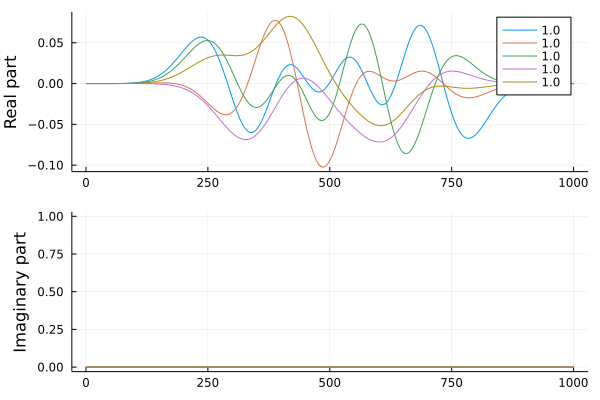

In [3]:
p1 = plot(real.(u), ylabel="Real part", label = round.(lam, digits= 7)') 
p2 = plot(imag.(u), ylabel="Imaginary part", legend = false) 

plot(p1, p2, layout = (2,1))

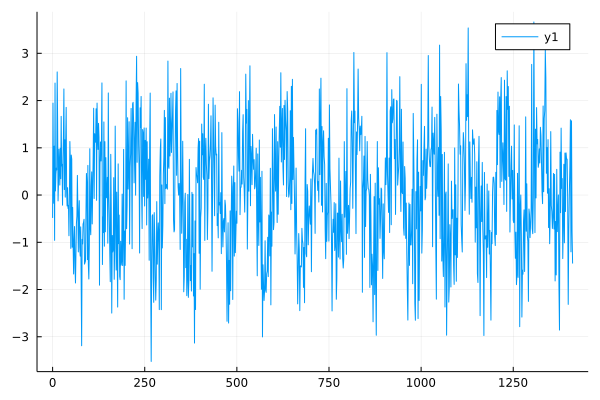

In [4]:
x = sin.(2*pi*0.01*t) + randn(N)
plot(t,x)

In [5]:
freq = collect(LinRange(-pi, pi, length(t)))
Pxx = abs2.(nufft1d3(t,ComplexF64.(x),-1,1e-15,freq))/N;

1000-element Array{Float64,1}:
 0.09621095786176909
 0.939215507785098
 0.584247014153805
 3.3214224082367774
 0.6528453158240572
 0.060849619013676734
 0.07711112882351626
 0.6968996395983101
 0.04486989564241987
 0.35989960069405136
 0.015703371783768554
 0.9946561147322611
 0.09769476201481794
 ⋮
 0.9946561147321172
 0.01570337178376824
 0.35989960069384536
 0.044869895642420075
 0.69689963959807
 0.0771111288236194
 0.060849619013620404
 0.6528453158244626
 3.321422408235202
 0.5842470141532771
 0.9392155077851027
 0.09621095786176899

In [6]:
@time Sb = bspec(t, x, W, K, 0.5, 0.0, false)

MTSpectrum{EigenCoefficient,Array{Float64,1},Nothing}([0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018  …  0.98, 0.982, 0.984, 0.986, 0.988, 0.9900000000000001, 0.9919999999999999, 0.994, 0.996, 0.998], [0.2689039486135774, 0.17151206988754386, 0.19676859367730812, 0.15334281819573178, 0.13628402521682573, 0.10124736799297707, 0.16205397228373344, 0.15705064477863317, 0.07696650847788773, 0.07886115968705285  …  4.394691437087677, 4.523110290385162, 4.150222927665207, 4.232181732450801, 4.194539631618372, 3.613624248755536, 3.7517880283545835, 4.638257989017224, 2.515380479353638, 1.1392140992587574], nothing, MTParameters(8.0, 5, 1000, 1.0, 1000, 1, nothing), EigenCoefficient(Complex{Float64}[-0.2698277845433099 + 0.5805325512553599im 0.14354495971963332 - 0.2871491451354469im … 0.6692122970282508 + 0.3693398860940786im -0.056201598323457 + 0.4270308065772509im; -0.3562313888217086 - 0.37895269352948324im 0.40490149026231326 - 0.07146842404035095im … -0.1218432502784

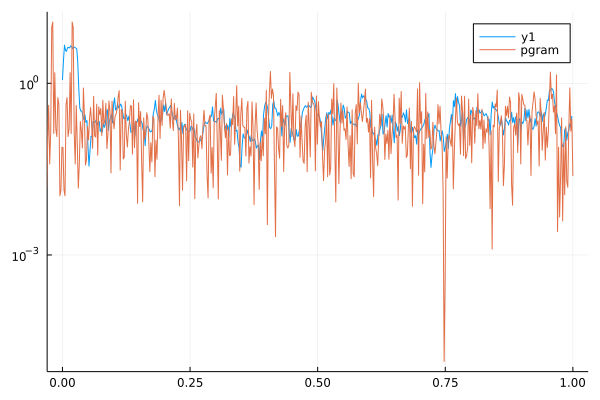

In [10]:
plot(Sb.f, Sb.S[end:-1:1], xlims = [0.0, 1.0])
plot!(freq/pi, Pxx/4, yscale = :log10, label = "pgram")

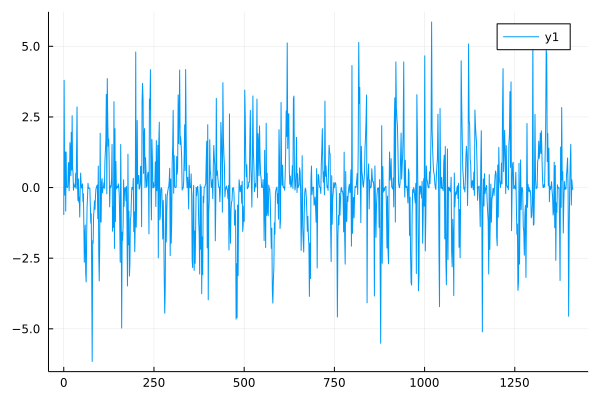

In [13]:
y = x .* (1 .+ cos.(2*pi*0.05*t))
plot(t,y)

In [15]:
@time Sxy = bspec(t, hcat(x,y), W, K, 0.5, 0.0)

(MTSpectrum{EigenCoefficient,Array{Float64,1},Nothing}[MTSpectrum{EigenCoefficient,Array{Float64,1},Nothing}([0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018  …  0.98, 0.982, 0.984, 0.986, 0.988, 0.9900000000000001, 0.9919999999999999, 0.994, 0.996, 0.998], [0.2689039486135774, 0.17151206988754386, 0.19676859367730812, 0.15334281819573178, 0.13628402521682573, 0.10124736799297707, 0.16205397228373344, 0.15705064477863317, 0.07696650847788773, 0.07886115968705285  …  4.394691437087677, 4.523110290385162, 4.150222927665207, 4.232181732450801, 4.194539631618372, 3.613624248755536, 3.7517880283545835, 4.638257989017224, 2.515380479353638, 1.1392140992587574], nothing, MTParameters(8.0, 5, 1000, 1.0, 1000, 1, nothing), EigenCoefficient(Complex{Float64}[-0.2698277845433099 + 0.5805325512553599im 0.14354495971963332 - 0.2871491451354469im … 0.6692122970282508 + 0.3693398860940786im -0.056201598323457 + 0.4270308065772509im; -0.3562313888217086 - 0.37895269352948324im 0.40490

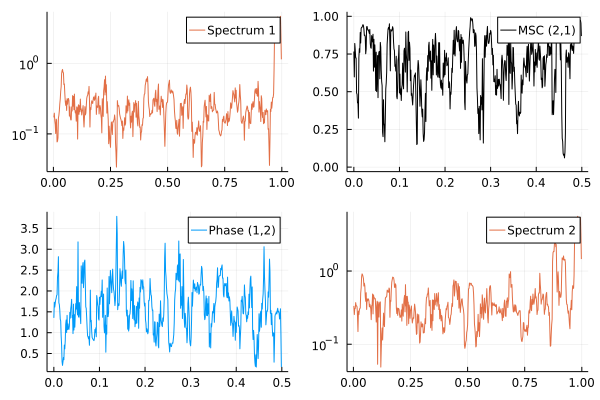

In [16]:
plot(Sxy)